___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [2]:
df = pd.read_csv('../DATA/Frozen_Dessert_Production.csv',parse_dates=True,index_col='DATE')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to **

In [5]:
df.columns= ['Production']

In [6]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

<AxesSubplot:xlabel='DATE'>

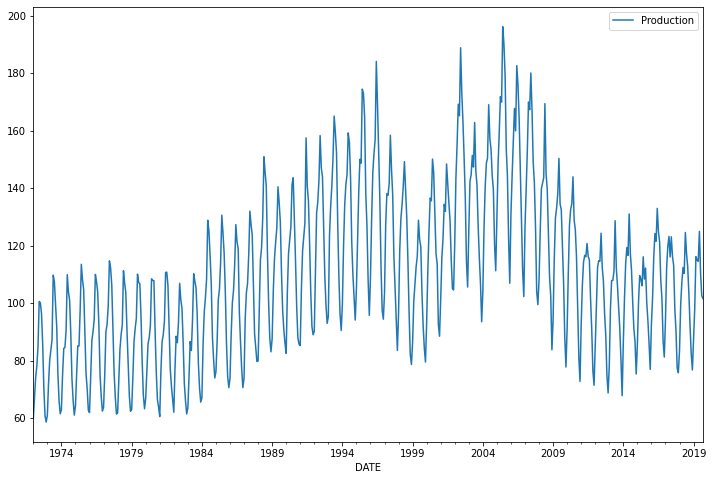

In [8]:
df.plot(figsize=(12,8))

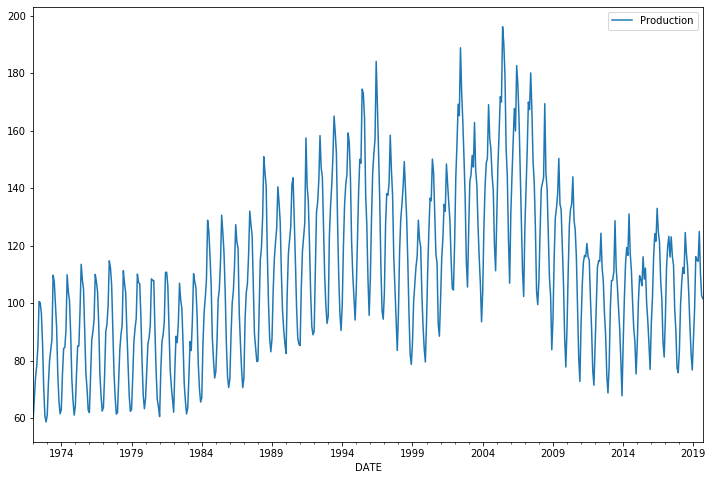

## Train Test Split

**TASK: Figure out the length of the data set**

In [9]:
len(df)

573

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [99]:
test_size=18
test_ind=len(df)-test_size
test_ind

555

In [100]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [101]:
train

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343


In [102]:
test

,Production
DATE,
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841
2018-07-01,117.2215
2018-08-01,112.6779
2018-09-01,103.3118
2018-10-01,92.1321
2018-11-01,82.4347
2018-12-01,76.7608


24

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [103]:
scaler=MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [104]:
scaled_train = scaler.transform(train)

In [105]:
scaled_test = scaler.transform(test)

In [106]:
len(test)

18

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [107]:
length_batch=12
generator = TimeseriesGenerator(scaled_train,
                               scaled_train,
                               length=length_batch,
                               batch_size=1)

In [108]:
X,y=generator[0]

In [109]:
X

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ]]])

In [110]:
y

array([[0.01774221]])

In [111]:
scaled_train

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

In [112]:
len(X[0])

12

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [113]:
n_features=1

In [114]:
model=Sequential()

model.add(LSTM(200,activation='relu',input_shape=(length_batch,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [116]:
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,
                                        length=length_batch,
                                        batch_size=1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [117]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [118]:
model.fit(generator,epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
543/543 [==============================] - 7s 10ms/step - loss: 0.0212 - val_loss: 0.0016
Epoch 2/20
543/543 [==============================] - 5s 9ms/step - loss: 0.0078 - val_loss: 0.0018
Epoch 3/20
543/543 [==============================] - 5s 10ms/step - loss: 0.0054 - val_loss: 0.0021


Epoch 1/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0261 - val_loss: 0.0043
Epoch 2/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 3/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0039 - val_loss: 0.0074
Epoch 4/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 5/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 6/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 7/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/20
531/531 [==============================] - 25s 47ms/step - loss: 0.0030 - val_loss: 0.0025


**TASK: Plot the history of the loss that occured during training.**

In [119]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

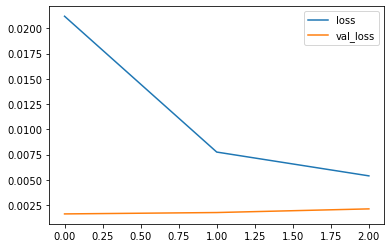

In [120]:
losses.plot()

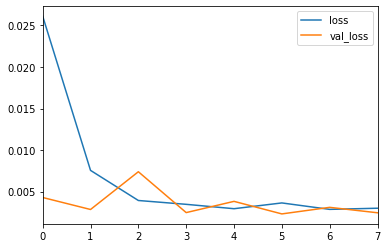

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [121]:
test_predictions = []
first_eval_batch=scaled_train[-length_batch:]
current_batch=first_eval_batch.reshape((1,length_batch,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [122]:
true_predictions = scaler.inverse_transform(test_predictions)

In [123]:
test['Predictions'] = true_predictions

<ipython-input-123-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


C:\Users\Marcial\Anaconda3\envs\tf2gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
test

,Production,Predictions
DATE,,
2018-04-01,112.4309,118.691062
2018-05-01,110.3544,122.444027
2018-06-01,124.5841,124.892353
2018-07-01,117.2215,121.696100
2018-08-01,112.6779,114.185078
2018-09-01,103.3118,101.450633
2018-10-01,92.1321,90.466588
2018-11-01,82.4347,82.387109
2018-12-01,76.7608,81.173608


,Production,Predictions
DATE,,
2017-10-01,90.4732,84.348756
2017-11-01,77.4378,75.246538
2017-12-01,75.8118,75.356393
2018-01-01,83.4343,84.964974
2018-02-01,99.4899,95.405271
2018-03-01,107.3152,103.265306
2018-04-01,112.4309,109.163361
2018-05-01,110.3544,113.237268
2018-06-01,124.5841,114.119150


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

<AxesSubplot:xlabel='DATE'>

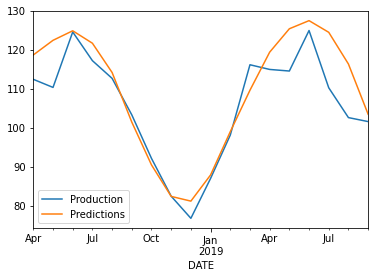

In [125]:
test.plot()

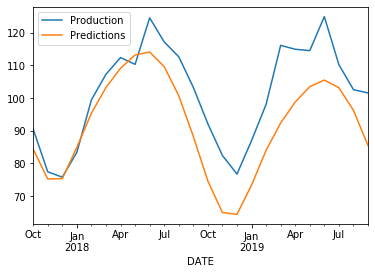

**TASK: Calculate your RMSE.**

In [126]:
from tensorflow.keras.metrics import *

In [127]:
# tensorflow.keras.metrics.mean_absolute_error(Production, Predictions).numpy()

In [128]:
from sklearn.metrics import mean_absolute_error

In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
mean_absolute_error(test['Production'],test['Predictions'])

4.92301424260313

In [131]:
mean_squared_error(test['Production'],test['Predictions'])

45.371844646907846

In [132]:
np.sqrt(mean_squared_error(test['Production'],test['Predictions']))

6.735862576308089

In [133]:
# Forecasting

In [134]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df)

In [146]:
length_forc = 12

generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,
                              length=length_forc,
                              batch_size=1)

In [147]:
model=Sequential()

model.add(LSTM(200,activation='relu',input_shape=(length_forc,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(generator,epochs=3)

Epoch 1/3
561/561 [==============================] - 6s 8ms/step - loss: 0.0180
Epoch 2/3
561/561 [==============================] - 5s 9ms/step - loss: 0.0186
Epoch 3/3
561/561 [==============================] - 5s 8ms/step - loss: 0.0063


In [148]:
forecast = []

periods = 21

first_eval_batch=scaled_train[-length_forc:]
current_batch=first_eval_batch.reshape((1,length_forc,n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [149]:
forecast = scaler.inverse_transform(forecast)

In [150]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [151]:
forecast

array([[120.75352218],
       [123.69636126],
       [126.9548135 ],
       [122.50109914],
       [115.00855688],
       [100.91676841],
       [ 89.3890234 ],
       [ 82.91406024],
       [ 84.09718544],
       [ 90.81159199],
       [101.80891288],
       [112.1077001 ],
       [123.15996396],
       [129.18684266],
       [131.61402149],
       [127.42929879],
       [117.72300549],
       [103.45912401],
       [ 91.21624338],
       [ 87.6598598 ],
       [ 89.85017508]])

In [152]:
forecast_index = pd.date_range(start='2019-10-01',periods=periods,freq="MS")
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                          columns=['Forecast'])
forecast_df

,Forecast
2019-10-01,120.753522
2019-11-01,123.696361
2019-12-01,126.954814
2020-01-01,122.501099
2020-02-01,115.008557
2020-03-01,100.916768
2020-04-01,89.389023
2020-05-01,82.914060
2020-06-01,84.097185
2020-07-01,90.811592


<AxesSubplot:xlabel='DATE'>

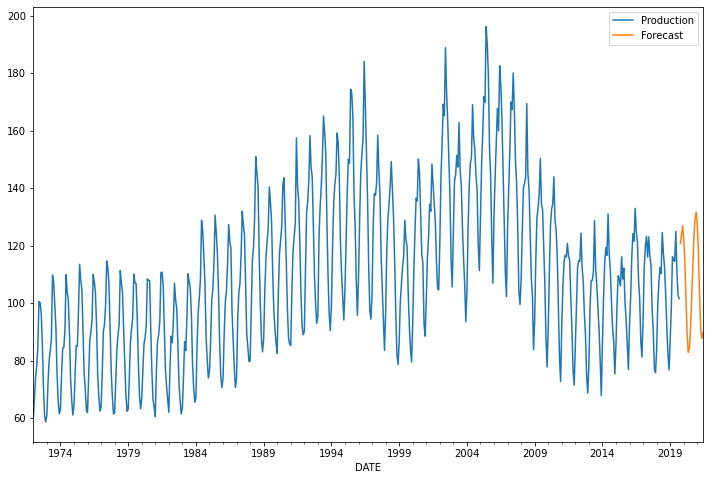

In [153]:
ax=df.plot()
forecast_df.plot(ax=ax,figsize=(12,8))